## Dcision Tree classifier using the famous Iris dataset.
The goal is to predict the species of an iris flower based on its sepal and petal measurements.

## 1. Import necessary libraries
- **`sklearn.datasets`** - For loading sample datasets
- **`train_test_split`** - Splits data into training and testing sets
- **`DecisionTreeClassifier`** - The main decision tree algorithm
- **`plot_tree`** - Visualizes the decision tree structure
- **`accuracy_score`, `classification_report`, `confusion_matrix`** - Model evaluation metrics
- **`pandas`** - Data manipulation and analysis
- **`matplotlib.pyplot`** - Basic plotting functionality
- **`seaborn`** - Statistical data visualization
- **`numpy`** - Numerical computations


In [ ]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## 2. Loading the Iris Dataset

This cell loads and prepares the famous Iris dataset for analysis:

- **`iris = datasets.load_iris()`** - Loads the Iris dataset from scikit-learn
- **`X = iris.data`** - Extracts the feature data (sepal/petal measurements)
- **`y = iris.target`** - Extracts the target labels (species as numbers 0, 1, 2)
- **Creates a pandas DataFrame** with feature columns named after the actual measurements
- **Adds target column** with numeric species labels
- **Maps species names** to create a human-readable 'species' column:
  - 0 → 'setosa'
  - 1 → 'versicolor' 
  - 2 → 'virginica'

The result is a clean DataFrame ready for exploratory data analysis and machine learning tasks.


In [123]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [124]:
df.shape

(150, 6)

In [125]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [127]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 3. Data Distribution Visualization
- **Layout**: Creates a 2x2 subplot grid to display all four Iris features
- **Histograms**: Shows the distribution of each feature (sepal length, sepal width, petal length, petal width) 
- **Species Comparison**: Overlays histograms for all three Iris species (setosa, versicolor, virginica) with transparency
- **Customization**: Includes proper labels, legends, and titles for each subplot
- **Purpose**: Helps identify patterns, overlaps, and separability between species based on individual features

This visualization is useful for understanding which features might be most effective for species classification.


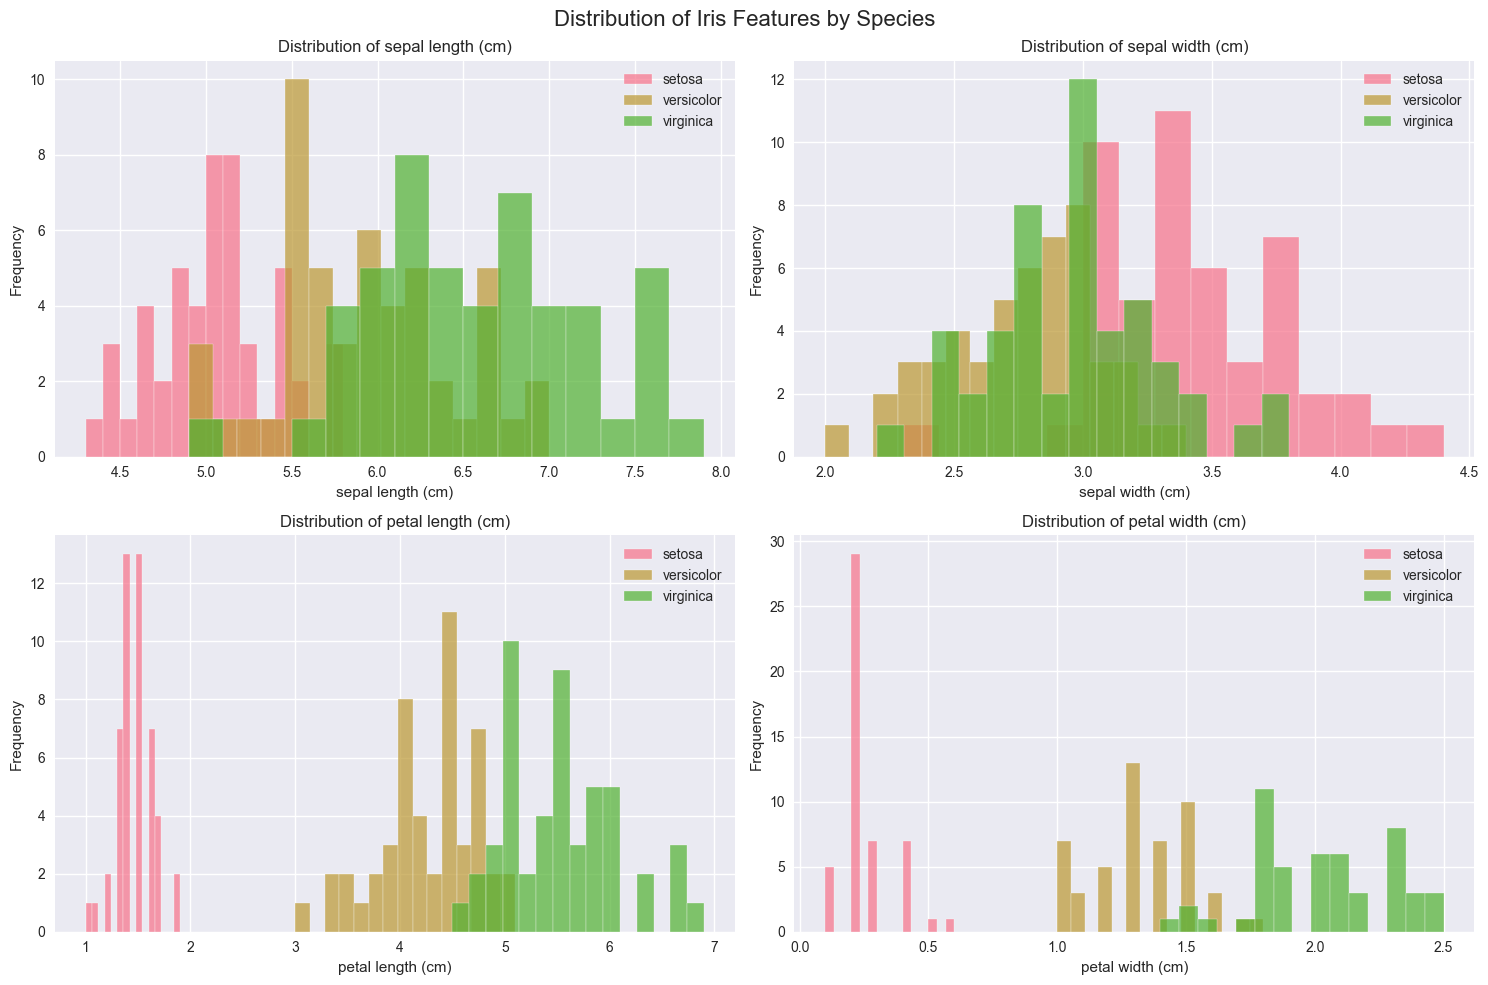

In [128]:
# Visualize the data distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Iris Features by Species', fontsize=16)

features = iris.feature_names
for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    for species in df['species'].unique():
        data = df[df['species'] == species][feature]
        ax.hist(data, alpha=0.7, label=species, bins=15)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


## 4. Data Splitting for Model Training

This cell splits the dataset into training and testing sets using scikit-learn's `train_test_split` function:

- **80% training data** (`test_size=0.2` means 20% for testing)
- **20% testing data** for model evaluation
- **Stratified split** ensures balanced representation of all target classes in both sets
- **Random state 42** for reproducible results
- **Shuffle enabled** to randomize data distribution

The output displays the dimensions of each split, helping verify the data has been properly divided for supervised learning.

In [129]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    shuffle=True, 
    random_state=42,
    stratify=y  # Ensure balanced split across classes
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")


Training set size: 120 samples
Testing set size: 30 samples
Features: 4


## 5. Decision Tree Classifier Training

This cell creates and trains a Decision Tree classifier with carefully tuned hyperparameters:

**Model Configuration:**
- **Max depth: 4** - Limits tree depth to prevent overfitting
- **Min samples split: 2** - Minimum samples needed to create a new split
- **Min samples leaf: 1** - Minimum samples required at leaf nodes
- **Criterion: Gini** - Uses Gini impurity for splitting decisions
- **Random state: 42** - Ensures reproducible results

**Training Output:**
- Displays tree structure metrics (depth and number of leaves)
- Shows **feature importances** - quantifies how much each feature contributes to the model's decision-making process
- Higher importance values indicate features that are more influential in classification

In [130]:
# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,          # Limit depth to prevent overfitting
    min_samples_split=2,  # Minimum samples required to split a node
    min_samples_leaf=1,   # Minimum samples required at a leaf node
    criterion='gini'      # Splitting criterion
)

# Train the model
dt_classifier.fit(X_train, y_train)

print("Decision Tree model trained successfully!")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")
print(f"Feature importances:")
for i, importance in enumerate(dt_classifier.feature_importances_):
    print(f"  {iris.feature_names[i]}: {importance:.4f}")


Decision Tree model trained successfully!
Tree depth: 4
Number of leaves: 7
Feature importances:
  sepal length (cm): 0.0063
  sepal width (cm): 0.0169
  petal length (cm): 0.5656
  petal width (cm): 0.4112


## 6. Model Evaluation and Performance Analysis

This cell evaluates the trained Decision Tree classifier's performance using comprehensive metrics:

**Prediction Generation:**
- Makes predictions on both training and test sets for comparison
- Calculates accuracy scores to assess model performance

**Performance Metrics:**
- **Training vs Test Accuracy** - Helps identify overfitting (large gap indicates overfitting)
- **Classification Report** - Provides precision, recall, F1-score, and support for each class
- **Confusion Matrix** - Shows actual vs predicted classifications in a matrix format

**Key Insights:**
- **Precision**: How many predicted positives were actually positive
- **Recall**: How many actual positives were correctly identified
- **F1-score**: Harmonic mean of precision and recall
- **Support**: Number of samples in each class

The confusion matrix reveals which classes the model confuses most often, helping identify areas for improvement.

In [131]:
# Make predictions on both training and test sets
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(cm)


Training Accuracy: 0.9917
Test Accuracy: 0.9333

Classification Report (Test Set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix (Test Set):
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


## 7. Confusion Matrix Visualization

This cell creates a visual heatmap of the confusion matrix to better understand classification performance:

**Visualization Features:**
- **Seaborn heatmap** with blue color scheme for clear readability
- **Annotated cells** showing exact prediction counts (`fmt='d'` for integers)
- **Species labels** on both axes instead of numeric class indices
- **8x6 figure size** for optimal viewing

**Interpretation:**
- **Diagonal cells** represent correct predictions (true positives for each class)
- **Off-diagonal cells** show misclassifications between species
- **Darker colors** indicate higher prediction counts
- Perfect classification would show values only on the diagonal

This visual representation makes it easy to identify which iris species the model confuses most often and assess the overall classification quality at a glance.

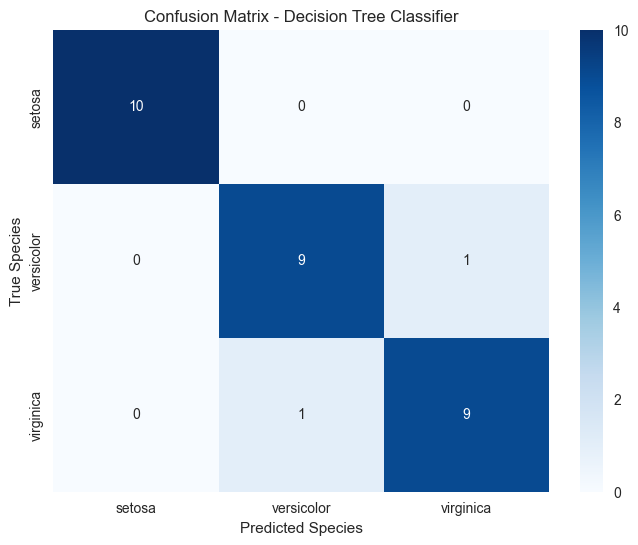

In [132]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.show()


## 8. Feature Importance Analysis

This cell creates a horizontal bar chart to visualize which features contribute most to the decision tree's classification decisions:

**Data Preparation:**
- Creates a DataFrame combining feature names with their importance scores
- **Sorts features** in ascending order for better visual hierarchy (most important at top)

**Visualization Features:**
- **Horizontal bar chart** for easy reading of feature names
- **10x6 figure size** optimized for feature comparison
- **Tight layout** prevents label cutoff

**Interpretation:**
- **Bar length** represents feature importance (0 to 1 scale)
- **Higher values** indicate features that contribute more to splitting decisions
- **Zero importance** means the feature wasn't used in any splits
- Features are ranked by their ability to reduce impurity when splitting nodes

This analysis helps understand which iris measurements (sepal/petal length/width) are most discriminative for species classification, providing insights into the biological characteristics that best distinguish between iris varieties.

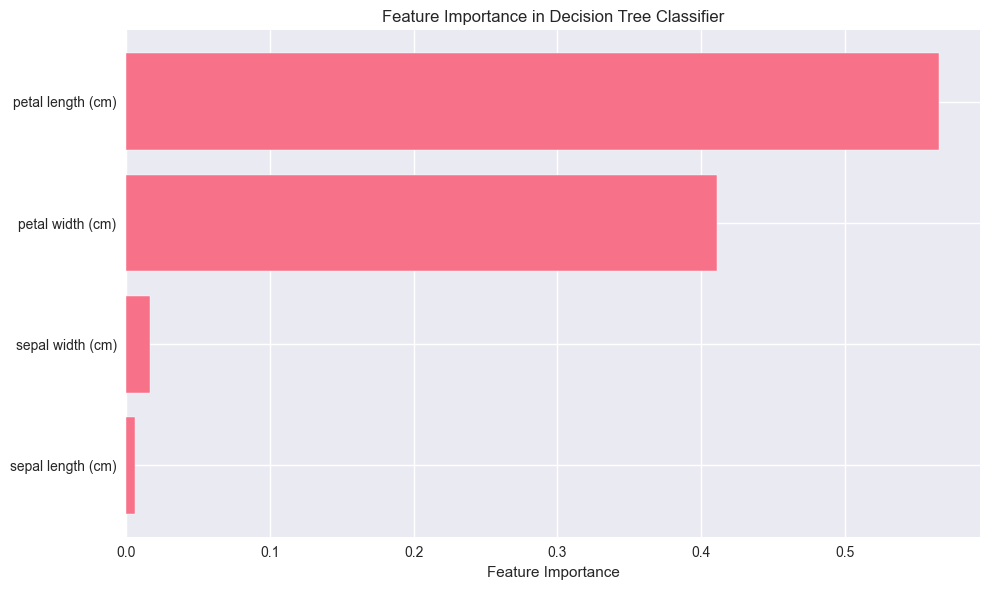

In [133]:
# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.tight_layout()
plt.show()


## 9. Decision Tree Structure Visualization

This cell creates a comprehensive visual representation of the trained decision tree's structure:

**Visualization Parameters:**
- **Large figure size (20x12)** to accommodate the full tree structure
- **Feature names** displayed at each decision node instead of generic labels
- **Class names** showing actual iris species rather than numeric codes
- **Filled nodes** with colors representing different classes
- **Rounded boxes** for better aesthetics and readability

**Tree Structure Elements:**
- **Internal nodes** show the splitting condition (e.g., "petal length ≤ 2.45")
- **Leaf nodes** display the final classification decision
- **Node colors** indicate the predominant class at each node
- **Sample counts** and class distributions visible in each node

This visualization helps understand the decision-making process, showing exactly how the model classifies iris species based on the four measured features. You can trace any prediction path from root to leaf to see the logical steps the algorithm follows.

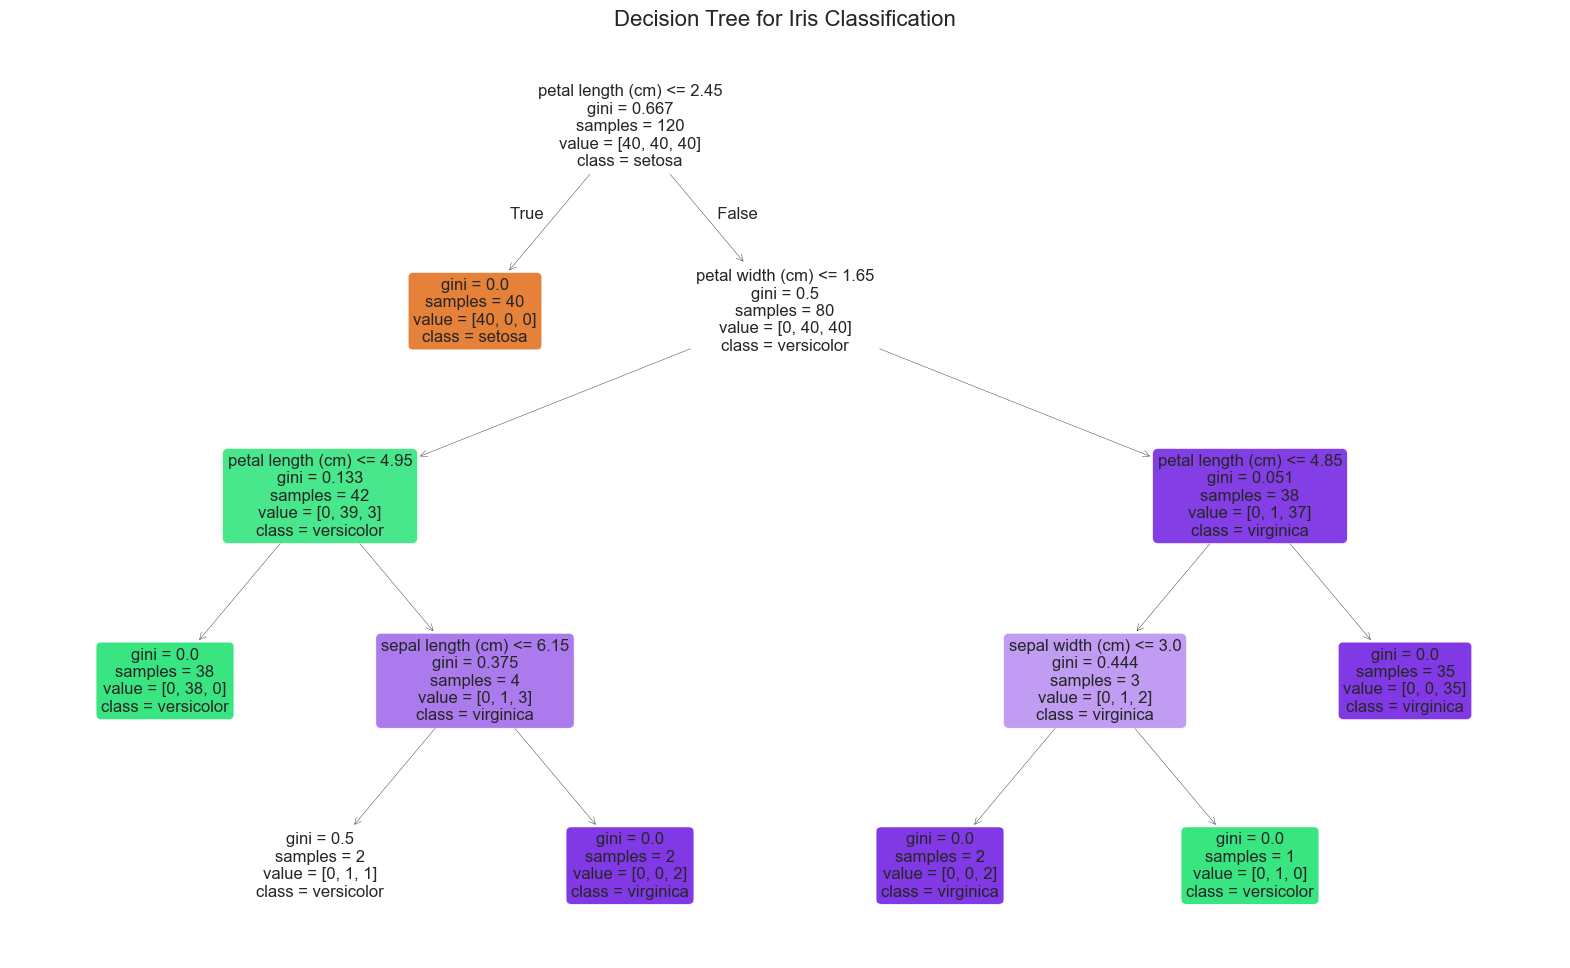

In [134]:
# Visualize the decision tree structure
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('Decision Tree for Iris Classification', fontsize=16)
plt.show()


## 10. Hyperparameter Tuning: Max Depth Analysis

This cell performs a systematic analysis of how the `max_depth` parameter affects model performance:

**Experiment Setup:**
- **Tests depths 1-10** to find optimal tree complexity
- **Trains separate models** for each depth value with consistent random state
- **Records both training and test accuracies** for overfitting detection

**Visualization Features:**
- **Dual-line plot** comparing training vs test performance
- **Blue circles** for training accuracy, **red circles** for test accuracy
- **Grid overlay** for easier value reading
- **Legend and clear labels** for interpretation

**Key Insights:**
- **Training accuracy** typically increases with depth (more complex trees)
- **Test accuracy** may plateau or decrease after optimal depth (overfitting)
- **Gap between lines** indicates overfitting severity
- **Optimal depth** balances complexity and generalization

The output identifies the best-performing depth value, helping choose the hyperparameter that maximizes test accuracy while avoiding overfitting. This analysis demonstrates the bias-variance tradeoff in decision trees.

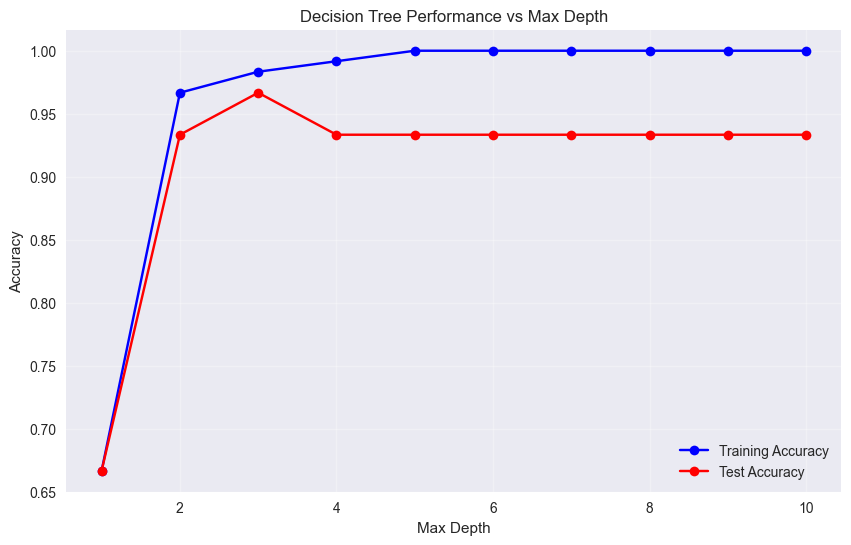

Best test accuracy: 0.9667 at depth 3


In [135]:
# Model comparison with different max_depth values
depths = range(1, 11)
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, 'bo-', label='Training Accuracy')
plt.plot(depths, test_accuracies, 'ro-', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Best test accuracy: {max(test_accuracies):.4f} at depth {depths[np.argmax(test_accuracies)]}")
